In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

import test
from utils.data_utils import get_loader
from models_swin.ms_swin_transformer import *
from models_swin.swin_transformer import SwinTransformer
import models_swin.ms_backup as ms_b

import matplotlib.pyplot as plt
# from visual import featuremap
import visual
import timm


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

args=test.parse_option()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


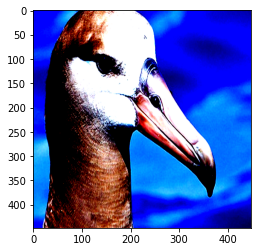

In [3]:
# data
_, test_loader = get_loader(args)
# train_list = list(enumerate(train_loader))
test_list = list(enumerate(test_loader))

# for i in range(0,3):
img, label = next(iter(test_loader))

plt.imshow(img[0,:].permute(1,2,0).detach().cpu().numpy())
# plt.imshow(test_loader.dataset.test_img[0])

In [17]:
# model
model_ckpt = torch.load('output/sample_run_swin_t_no_checkpoint.bin')
# model_ckpt = torch.load('output/ms_sample_run_swin_t_no_check_checkpoint.bin')
# model=MSSwinTransformer(img_size=448, num_classes=200, num_feature_layers=1, detail_features=True)
# model=SwinTransformer(img_size=448, num_classes=200)
model=ms_b.MSSwinTransformer(img_size=448, num_classes=200)
model.load_state_dict(model_ckpt['model'], strict=False)
model.eval()
# x=torch.randn((16,3,448,448))
x = test_list[0][1][0]
f=model.forward_features(x)
logits=model(x)
# f.shape

In [ ]:
# multi-layer feature map
layers = [2, 2, 6, 2]
lf = model.layer_features
for i in range(len(layers)):
    for j in range(layers[i]):
        stage = i
        block = j
        edge=6
        corr,f = visual.featuremap(lf[stage][block], num_batch=0, edge=edge, start_ch=0)

        plt.figure()
        plt.suptitle('stage={0},block={1}'.format(stage, block), fontsize=14)
        plt.subplot(1, 2, 1)
        plt.imshow(corr)    
        plt.title("channel correlation")
        plt.subplot(1, 2, 2)
        plt.imshow(f)
        plt.title("feature map")
        # plt.colorbar()
#         plt.savefig('./visual/stage={0}_block={1}_edge{2}.png'.format(stage,block,edge),dpi=300)
        plt.show()                                    

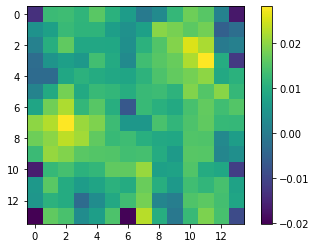

In [98]:
s=3
b=-1
plt.imshow(lf[s][b].mean(2).view(-1,int(112/2**s),int(112/2**s)).detach()[5,:,:])
lf[3][1].shape
plt.colorbar()

tensor(0)


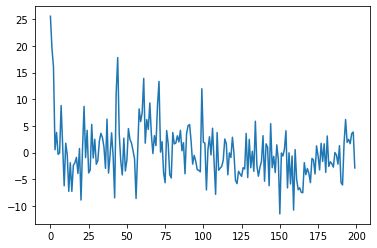

In [29]:
## logits
# s=torch.nn.Sigmoid()(logits)
# sd=s.detach()
# plt.plot(sd[1,:])
plt.plot(logits[2,:].detach())
print(torch.argmax(logits[2,:]))

In [122]:
tl=iter(test_loader)

In [6]:
test_model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True)

In [16]:
# CAM

from pytorch_grad_cam import GradCAM, \
                             ScoreCAM, \
                             GradCAMPlusPlus, \
                             AblationCAM, \
                             XGradCAM, \
                             EigenCAM, \
                             EigenGradCAM

from pytorch_grad_cam import GuidedBackpropReLUModel
from pytorch_grad_cam.utils.image import show_cam_on_image, \
                                         deprocess_image, \
                                         preprocess_image



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


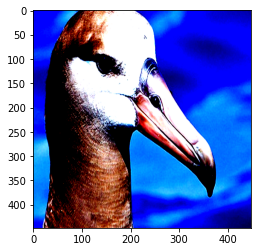

In [6]:
plt.imshow(img[0,:].permute(1,2,0).detach().cpu().numpy())

In [13]:
os.listdir('models_swin/')

['ms_backup.py',
 'swin_transformer.py',
 '.ipynb_checkpoints',
 '__init__.py',
 'build.py',
 'fusion.py',
 'ms_swin_transformer.py',
 '__pycache__']

In [16]:
os.path.join('models_swin/', 'ms_backup.py')

'models_swin/ms_backup.py'

In [96]:
# confusion matrix
test_loader.dataset[32][1]
labels=[test_loader.dataset[i][1] for i in range(len(test_loader.dataset))]

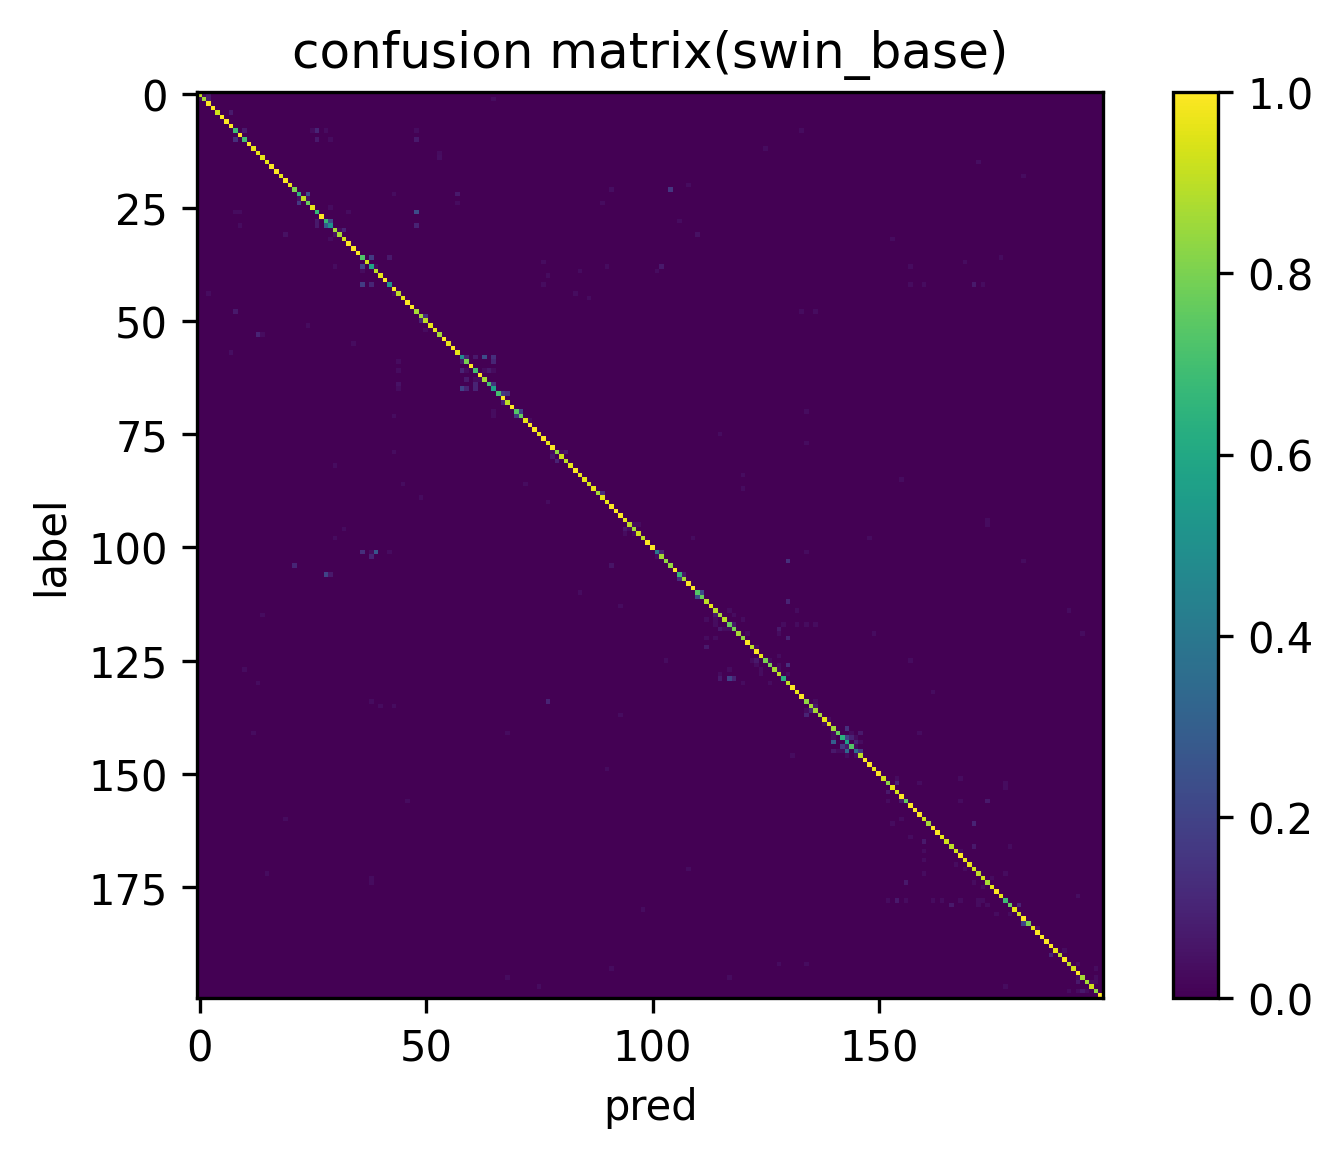

In [184]:
# confusion matrix
pred = torch.Tensor(np.load('confusion_base.npy'))
conf=np.zeros((200,200))
pred1 = []
pred5 = []
for i in range(len(pred)):
    pred1.append(torch.argmax(pred[i]))
    pred5.append(torch.topk(pred[i], k=5))
    
for n, i in enumerate(labels):
    j = pred1[n]
    conf[i][j]+=1
    
plt.figure(dpi=300)
plt.imshow((conf.T/conf.sum(1)).T)
plt.colorbar()
plt.title('confusion matrix(swin_base)')
plt.xlabel('pred')
plt.ylabel('label')
plt.savefig('confusion_matrix_base.png',dpi=300)
plt.show()

In [185]:
conf.trace()/conf.sum()

0.897134967207456

In [ ]:
pred5

In [187]:
# Vision Transformer

from models.modeling import VisionTransformer

TypeError: __init__() missing 1 required positional argument: 'config'

In [190]:
a=torch.randn(3,5)
b=torch.randn(3,5)
c=torch.matmul(a,b.T)
a
b
c

tensor([[ 2.6123, -0.5380, -0.1768],
        [-0.5152, -1.1378,  2.7345],
        [ 1.0510, -1.3632, -1.8129]])